In [4]:
#import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
import math 
import numpy as np
from sklearn import preprocessing
import time
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
import warnings
warnings.filterwarnings( "ignore" )
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
import keras
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Convolution1D, Dropout, MaxPooling1D,GlobalAveragePooling1D
from keras.optimizers import SGD
from keras.utils import np_utils
from sklearn.model_selection import KFold
from keras.losses import binary_crossentropy

In [2]:
from google.colab import files
uploade = files.upload()

Saving boston.csv to boston.csv
Saving chb.csv to chb.csv


#KNN

In [ ]:
class ClassKNN(object):
    def __init__(self, k):
        self.k = k
        
    @staticmethod   
    def _euclidean_distance(row1, row2):
        """
        Calculate and return the euclidean distance between the two parameters passed.
        """
        row1, row2 = np.array(row1), np.array(row2)
        distance = 0.0
        for i in range(len(row1) - 1):
            distance +=(row1[i] - row2[i])**2
        return np.sqrt(distance)
    
    def predict(self, train_set, test_instance):
        """
        Calculate and Return the class of the test instance provided.
        """
        #### Creating a sorted list based on the distance
        distances = []
        for i in range(len(train_set)):
            dist = self._euclidean_distance(train_set[i][:-1], test_instance) # Slicing last column as its the target column
            distances.append((train_set[i], dist))
        distances.sort(key=lambda x:x[1]) # sort distance list by distance
        #####

        ##### Creating a list of K neighbors
        neighbors = [] # Store list of K neighbors
        for i in range(self.k):
            neighbors.append(distances[i][0])
        ########
        ######## Calculating the majority class vote based on the meighbors list
        classes = {}
        for i in range(len(neighbors)):
            response = neighbors[i][-1] # Get the target value
            if response in classes:
                classes[response] +=1  # If class already exits increment by 1
            else:
                classes[response] =1
        ########
        sorted_classes = sorted(classes.items(), key=lambda x:x[1], reverse = True )
        return sorted_classes[0][0] # return the class with majority vote 
    
    @staticmethod
    def evaluate(y_true, y_pred):
        """
        Calculate and return the accuracy.
        """
        n_correct = 0
        for act, pred in zip(y_true, y_pred):
            if act == pred:
                n_correct += 1
        return n_correct / len(y_true)   # Return the accuracy of the classification
    


In [ ]:
def train_test_split(dataset, test_size = 0.25):
    """
    Split the data into test and train set.
    """
    n_test = int(len(dataset) * test_size)
    test_set = dataset.sample(n_test)
    train_set = []
  
    for ind in dataset.index:
        if ind in test_set.index:
            continue
        train_set.append(dataset.iloc[ind])
        
    train_set = pd.DataFrame(train_set).astype(float).values.tolist()
    test_set = test_set.astype(float).values.tolist()
    return train_set, test_set

In [ ]:
def cal_TPR_FPR(tp,tn,fp,fn):
  """
  Calcuate and return the true positive rate and false positive rate.
  """
  tpr = tp/ (tp + fn)
  fpr = fp / (fp + fn)
  return tpr, fpr

In [ ]:
### Dictionary to hold the time of execution 
execution_time_dic = {}

##### EEG Dataset

In [ ]:
# Load the dataset
df = pd.read_csv("data.csv")
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,...,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,-38,-10,35,64,113,152,164,127,50,-47,-121,-138,-125,-101,-50,11,39,24,48,64,46,13,-19,-61,-96,-130,-132,-116,-115,-71,...,54,90,111,107,64,32,18,-25,-69,-65,-44,-33,-57,-88,-114,-130,-114,-83,-53,-79,-72,-85,-109,-98,-72,-65,-63,-11,10,8,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,232,237,258,212,2,-267,-605,-850,-1001,-1109,-1090,-967,-746,-464,-152,118,318,427,473,485,447,397,339,312,314,326,335,332,324,310,...,27,146,229,269,297,307,303,305,306,307,280,231,159,85,51,43,62,63,63,69,89,123,136,127,102,95,105,131,163,168,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,-99,-94,-96,-104,-103,-92,-75,-69,-69,-53,-37,-14,-10,-39,-78,-102,-98,-80,-54,-40,-35,-39,-32,-13,7,34,41,33,6,...,-82,-107,-126,-124,-108,-84,-68,-61,-56,-63,-62,-33,1,28,45,37,48,62,80,66,23,-11,-39,-44,-42,-45,-48,-42,-6,29,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,-72,-68,-74,-80,-83,-73,-68,-61,-58,-59,-64,-79,-84,-97,-94,-84,-77,-75,-72,-68,-76,-76,-72,-67,-69,-69,-69,-67,-68,...,-69,-66,-74,-69,-61,-51,-45,-45,-49,-58,-64,-78,-80,-90,-87,-83,-78,-64,-38,-22,-29,-42,-51,-68,-71,-69,-69,-74,-74,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,-90,-103,-84,-43,-9,3,-21,-60,-96,-103,-75,-29,14,55,78,73,28,-13,-43,-68,-78,-75,-55,-41,-19,-20,-29,-36,-20,...,38,26,10,-4,-13,-8,0,10,19,29,57,63,45,7,-13,-23,-9,9,11,3,-1,-2,4,18,27,27,14,15,11,10,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [ ]:
# Drop the first column of the dataframe
df.drop(df.columns[0], axis=1, inplace=True)

In [ ]:
# Get the feature values
feature_data = df.iloc[:,0:-1]
feature_data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,...,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
0,135,190,229,223,192,125,55,-9,-33,-38,-10,35,64,113,152,164,127,50,-47,-121,-138,-125,-101,-50,11,39,24,48,64,46,13,-19,-61,-96,-130,-132,-116,-115,-71,-14,...,43,54,90,111,107,64,32,18,-25,-69,-65,-44,-33,-57,-88,-114,-130,-114,-83,-53,-79,-72,-85,-109,-98,-72,-65,-63,-11,10,8,-17,-15,-31,-77,-103,-127,-116,-83,-51
1,386,382,356,331,320,315,307,272,244,232,237,258,212,2,-267,-605,-850,-1001,-1109,-1090,-967,-746,-464,-152,118,318,427,473,485,447,397,339,312,314,326,335,332,324,310,312,...,-136,27,146,229,269,297,307,303,305,306,307,280,231,159,85,51,43,62,63,63,69,89,123,136,127,102,95,105,131,163,168,164,150,146,152,157,156,154,143,129
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,-99,-94,-96,-104,-103,-92,-75,-69,-69,-53,-37,-14,-10,-39,-78,-102,-98,-80,-54,-40,-35,-39,-32,-13,7,34,41,33,6,-15,...,-54,-82,-107,-126,-124,-108,-84,-68,-61,-56,-63,-62,-33,1,28,45,37,48,62,80,66,23,-11,-39,-44,-42,-45,-48,-42,-6,29,57,64,48,19,-12,-30,-35,-35,-36
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,-72,-68,-74,-80,-83,-73,-68,-61,-58,-59,-64,-79,-84,-97,-94,-84,-77,-75,-72,-68,-76,-76,-72,-67,-69,-69,-69,-67,-68,-69,...,-61,-69,-66,-74,-69,-61,-51,-45,-45,-49,-58,-64,-78,-80,-90,-87,-83,-78,-64,-38,-22,-29,-42,-51,-68,-71,-69,-69,-74,-74,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,-90,-103,-84,-43,-9,3,-21,-60,-96,-103,-75,-29,14,55,78,73,28,-13,-43,-68,-78,-75,-55,-41,-19,-20,-29,-36,-20,1,...,37,38,26,10,-4,-13,-8,0,10,19,29,57,63,45,7,-13,-23,-9,9,11,3,-1,-2,4,18,27,27,14,15,11,10,4,2,-12,-32,-41,-65,-83,-89,-73


In [ ]:
#Mapping Target for one V/S all logistic classification
df['y'] = df.y.map({1: 1, 2: 0, 3: 0, 4: 0, 5:0}) # Checking for presence of CLass 1
df.head(5)


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,...,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,135,190,229,223,192,125,55,-9,-33,-38,-10,35,64,113,152,164,127,50,-47,-121,-138,-125,-101,-50,11,39,24,48,64,46,13,-19,-61,-96,-130,-132,-116,-115,-71,-14,...,54,90,111,107,64,32,18,-25,-69,-65,-44,-33,-57,-88,-114,-130,-114,-83,-53,-79,-72,-85,-109,-98,-72,-65,-63,-11,10,8,-17,-15,-31,-77,-103,-127,-116,-83,-51,0
1,386,382,356,331,320,315,307,272,244,232,237,258,212,2,-267,-605,-850,-1001,-1109,-1090,-967,-746,-464,-152,118,318,427,473,485,447,397,339,312,314,326,335,332,324,310,312,...,27,146,229,269,297,307,303,305,306,307,280,231,159,85,51,43,62,63,63,69,89,123,136,127,102,95,105,131,163,168,164,150,146,152,157,156,154,143,129,1
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,-99,-94,-96,-104,-103,-92,-75,-69,-69,-53,-37,-14,-10,-39,-78,-102,-98,-80,-54,-40,-35,-39,-32,-13,7,34,41,33,6,-15,...,-82,-107,-126,-124,-108,-84,-68,-61,-56,-63,-62,-33,1,28,45,37,48,62,80,66,23,-11,-39,-44,-42,-45,-48,-42,-6,29,57,64,48,19,-12,-30,-35,-35,-36,0
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,-72,-68,-74,-80,-83,-73,-68,-61,-58,-59,-64,-79,-84,-97,-94,-84,-77,-75,-72,-68,-76,-76,-72,-67,-69,-69,-69,-67,-68,-69,...,-69,-66,-74,-69,-61,-51,-45,-45,-49,-58,-64,-78,-80,-90,-87,-83,-78,-64,-38,-22,-29,-42,-51,-68,-71,-69,-69,-74,-74,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65,0
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,-90,-103,-84,-43,-9,3,-21,-60,-96,-103,-75,-29,14,55,78,73,28,-13,-43,-68,-78,-75,-55,-41,-19,-20,-29,-36,-20,1,...,38,26,10,-4,-13,-8,0,10,19,29,57,63,45,7,-13,-23,-9,9,11,3,-1,-2,4,18,27,27,14,15,11,10,4,2,-12,-32,-41,-65,-83,-89,-73,0


In [ ]:
train_set, test_set = train_test_split(df )

In [ ]:
len(train_set) , len(test_set)


(8625, 2875)

In [ ]:
knn = ClassKNN(k=3)
preds = []

for row in test_set:
    predictors_only = row[:-1]
    prediction = knn.predict(train_set, predictors_only)
    preds.append(prediction)
    
actual = np.array(test_set)[:, -1]
knn.evaluate(actual, preds)


0.9293913043478261

In [ ]:
from sklearn.metrics import confusion_matrix
tp, fn, fp, tn = confusion_matrix(actual, preds,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

Outcome values : 
 382 202 1 2290


In [ ]:
tpr, fpr = cal_TPR_FPR(tp, fn, fp, tn)

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve


disp = plot_precision_recall_curve(classifier, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

##### With boston data set 

In [ ]:
# Load the dataset
df = pd.read_csv("boston.csv")
df.head()

,Unnamed: 0,f1,f2,f3,f4,f5,class
0,0,0.887621,0.185875,2.299474,2.299474,0.581396,healthy
1,1,0.783744,0.163794,2.299480,2.299480,0.588340,healthy
2,2,0.875873,0.154714,2.299477,2.299477,0.589802,healthy
3,3,0.881293,0.138396,2.299481,2.299481,0.592911,healthy
4,4,0.798116,0.125291,2.299481,2.299481,0.595338,healthy


In [ ]:
df=df.iloc[:,1:]

In [ ]:
df["Target"] = df["class"]

df['Target'] = df.Target.map({"seizure": 1, "healthy": 0, "transation": 0}) # Checking for presence of CLass 1
df.head(5)
df.drop(df.columns[5], axis=1, inplace=True)


In [ ]:
df.head(5)

,f2,f3,f4,f5,Target
0,0.185875,2.299474,2.299474,0.581396,0
1,0.163794,2.299480,2.299480,0.588340,0
2,0.154714,2.299477,2.299477,0.589802,0
3,0.138396,2.299481,2.299481,0.592911,0
4,0.125291,2.299481,2.299481,0.595338,0


In [ ]:
train_set, test_set = train_test_split(df )

In [ ]:
len(train_set) , len(test_set)

(225, 75)

In [ ]:
knn = ClassKNN(k=3)
preds = []

for row in test_set:
    predictors_only = row[:-1]
    prediction = knn.predict(train_set, predictors_only)
    preds.append(prediction)
    
actual = np.array(test_set)[:, -1]
knn.evaluate(actual, preds)

0.9866666666666667

In [ ]:
from sklearn.metrics import confusion_matrix
tp, fn, fp, tn = confusion_matrix(actual, preds,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

Outcome values : 
 20 7 4 44


In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
precision = precision_score(actual, preds)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(actual, preds)
print('Recall: %f' % recall)

Precision: 0.966667
Recall: 1.000000


In [ ]:
print(classification_report(actual, preds))

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99        46
         1.0       0.97      1.00      0.98        29

    accuracy                           0.99        75
   macro avg       0.98      0.99      0.99        75
weighted avg       0.99      0.99      0.99        75



##### With CHB MIT Dataset

In [ ]:
# Load the dataset
df = pd.read_csv("chb.csv")
df.head(5)

,T8-P8-1_n_peaks,T8-P8-1_n_crossings,T8-P8-1_hfd,T8-P8-1_pfd,T8-P8-1_hurst_exp,T8-P8-1_spectral_entropy,T8-P8-1_total_power,T8-P8-1_median_freq,T8-P8-1_peak_freq,T8-P8-1_hjorth_mobility,T8-P8-1_hjorth_complexity,T8-P8-1_power_1hz,T8-P8-1_power_5hz,T8-P8-1_power_10hz,T8-P8-1_power_15hz,T8-P8-1_power_20hz,seizure
0,183,153,0.094016,0.611024,0.879401,0.747444,5.090000e-10,3,1,0.002766,171.222337,0.420823,0.226051,0.128492,0.106838,0.117797,0
1,183,165,0.092275,0.611024,0.746361,0.765824,5.560000e-10,3,1,0.003211,148.493351,0.384135,0.234295,0.140616,0.115382,0.125572,0
2,186,170,0.098374,0.610385,0.687973,0.752050,5.450000e-10,3,1,0.003564,142.209197,0.389655,0.238327,0.124545,0.109260,0.138213,0
3,189,166,0.099552,0.609756,0.726399,0.754101,5.920000e-10,3,1,0.003514,140.840795,0.396989,0.232559,0.120853,0.118132,0.131467,0
4,188,167,0.101196,0.609756,0.755442,0.758187,5.830000e-10,3,1,0.003494,142.434220,0.390794,0.230665,0.125717,0.119646,0.133177,0


In [ ]:
#df=df.iloc[:,1:]
#df=df.drop(['subject'],axis=1)
#df.head(2)

In [ ]:
train_set, test_set = train_test_split(df )

In [ ]:
len(train_set) , len(test_set)

(750, 250)

In [ ]:
import time

In [ ]:
knn = ClassKNN(k=3)
preds = []
start_time = time.time()
for row in test_set:
    predictors_only = row[:-1]
    prediction = knn.predict(train_set, predictors_only)
    preds.append(prediction)
end_time = time.time()    


In [ ]:
actual = np.array(test_set)[:, -1]
knn.evaluate(actual, preds)

0.984

In [ ]:
tp, fn, fp, tn = confusion_matrix(actual, preds,labels=[1,0]).reshape(-1)


In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(actual, preds)

# Logistic  Regression

In [27]:
def SplitData(xdata, ydata, test_s):
    """
    This function splits the features data and target data into test and training data as per the test size provided.
    """
    x_train, x_test, y_train, y_test = train_test_split(xdata,ydata,test_size = test_s ,stratify= ydata, random_state = 0)
    return x_train, x_test, y_train, y_test


In [ ]:
def probability(theta, x):
    """
    This function calculates the sigmoid function.
    """
    pred = np.dot(x, theta)
    return 1 / (1 + np.exp(-pred))
 

In [ ]:
def cost_function(x, y, theta):
    """
    This function calculates the logistic regression cost function.(j(0) = (1/n)[y * log(h(0) + (1-y)log(1-h(0)))] )
    """
    n = len(y)
    J = -(1 / n) * np.sum(y * np.log(probability(theta, x)) + (1 - y) * np.log(1 - probability(theta, x)))
    return J


In [ ]:
#gradient function
def gradient_descent(x,y, theta,alpha, iterations):
        n = len(y)
        cost_history = [0] * iterations             # Create a array of the size equal to no.of iteration to save CostHistoty.
        for iteration in range(iterations):
                y_pred = probability(theta, x)      # Calculate h0(x)
                gradient = x.T.dot(y_pred - y)/n
                theta = theta - alpha*gradient      # update the parameter
                cost = cost_function(x,y,theta)
                cost_history[iteration] = cost
                if(cost > cost_history[iteration-1]):  # cost increases from the previous step decrease the alpha value
                     alpha = alpha*0.1
                   
        return theta, cost_history


In [ ]:
def Accuracy(theta):
    """
    This function calculates the accuracy of the classification
    """
    correct = 0
    length = len(x_test)                               # Total number of samples
    prediction = (probability(theta, x_test) > 0.5)    # Get the class of the data
    _y = y_test.reshape(-1, 1)                         # Create a vector of the target data
    correct = prediction == _y                         # Compare actual and predicted class 
    my_accuracy = (np.sum(correct) / length)*100       # Acurracy = num of correctly classified / total number of samples
    print ('LR Accuracy %: ', my_accuracy)
          

##### EEG Data

In [ ]:
df = pd.read_csv("data.csv")

In [ ]:
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,...,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,-38,-10,35,64,113,152,164,127,50,-47,-121,-138,-125,-101,-50,11,39,24,48,64,46,13,-19,-61,-96,-130,-132,-116,-115,-71,...,54,90,111,107,64,32,18,-25,-69,-65,-44,-33,-57,-88,-114,-130,-114,-83,-53,-79,-72,-85,-109,-98,-72,-65,-63,-11,10,8,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,232,237,258,212,2,-267,-605,-850,-1001,-1109,-1090,-967,-746,-464,-152,118,318,427,473,485,447,397,339,312,314,326,335,332,324,310,...,27,146,229,269,297,307,303,305,306,307,280,231,159,85,51,43,62,63,63,69,89,123,136,127,102,95,105,131,163,168,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,-99,-94,-96,-104,-103,-92,-75,-69,-69,-53,-37,-14,-10,-39,-78,-102,-98,-80,-54,-40,-35,-39,-32,-13,7,34,41,33,6,...,-82,-107,-126,-124,-108,-84,-68,-61,-56,-63,-62,-33,1,28,45,37,48,62,80,66,23,-11,-39,-44,-42,-45,-48,-42,-6,29,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,-72,-68,-74,-80,-83,-73,-68,-61,-58,-59,-64,-79,-84,-97,-94,-84,-77,-75,-72,-68,-76,-76,-72,-67,-69,-69,-69,-67,-68,...,-69,-66,-74,-69,-61,-51,-45,-45,-49,-58,-64,-78,-80,-90,-87,-83,-78,-64,-38,-22,-29,-42,-51,-68,-71,-69,-69,-74,-74,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,-90,-103,-84,-43,-9,3,-21,-60,-96,-103,-75,-29,14,55,78,73,28,-13,-43,-68,-78,-75,-55,-41,-19,-20,-29,-36,-20,...,38,26,10,-4,-13,-8,0,10,19,29,57,63,45,7,-13,-23,-9,9,11,3,-1,-2,4,18,27,27,14,15,11,10,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [ ]:
#df['y'].value_counts() 

In [ ]:
df.drop(df.columns[0], axis=1, inplace=True) # Drop the 1st column from the table

In [ ]:
# Created a features dataframe from the original dataframe
feature_data = df.iloc[:,0:-1]
feature_data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,...,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
0,135,190,229,223,192,125,55,-9,-33,-38,-10,35,64,113,152,164,127,50,-47,-121,-138,-125,-101,-50,11,39,24,48,64,46,13,-19,-61,-96,-130,-132,-116,-115,-71,-14,...,43,54,90,111,107,64,32,18,-25,-69,-65,-44,-33,-57,-88,-114,-130,-114,-83,-53,-79,-72,-85,-109,-98,-72,-65,-63,-11,10,8,-17,-15,-31,-77,-103,-127,-116,-83,-51
1,386,382,356,331,320,315,307,272,244,232,237,258,212,2,-267,-605,-850,-1001,-1109,-1090,-967,-746,-464,-152,118,318,427,473,485,447,397,339,312,314,326,335,332,324,310,312,...,-136,27,146,229,269,297,307,303,305,306,307,280,231,159,85,51,43,62,63,63,69,89,123,136,127,102,95,105,131,163,168,164,150,146,152,157,156,154,143,129
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,-99,-94,-96,-104,-103,-92,-75,-69,-69,-53,-37,-14,-10,-39,-78,-102,-98,-80,-54,-40,-35,-39,-32,-13,7,34,41,33,6,-15,...,-54,-82,-107,-126,-124,-108,-84,-68,-61,-56,-63,-62,-33,1,28,45,37,48,62,80,66,23,-11,-39,-44,-42,-45,-48,-42,-6,29,57,64,48,19,-12,-30,-35,-35,-36
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,-72,-68,-74,-80,-83,-73,-68,-61,-58,-59,-64,-79,-84,-97,-94,-84,-77,-75,-72,-68,-76,-76,-72,-67,-69,-69,-69,-67,-68,-69,...,-61,-69,-66,-74,-69,-61,-51,-45,-45,-49,-58,-64,-78,-80,-90,-87,-83,-78,-64,-38,-22,-29,-42,-51,-68,-71,-69,-69,-74,-74,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,-90,-103,-84,-43,-9,3,-21,-60,-96,-103,-75,-29,14,55,78,73,28,-13,-43,-68,-78,-75,-55,-41,-19,-20,-29,-36,-20,1,...,37,38,26,10,-4,-13,-8,0,10,19,29,57,63,45,7,-13,-23,-9,9,11,3,-1,-2,4,18,27,27,14,15,11,10,4,2,-12,-32,-41,-65,-83,-89,-73


In [ ]:
#Mapping Target for one V/S all logistic classification
df['y'] = df.y.map({1: 1, 2: 0, 3: 0, 4: 0, 5:0}) # CLass 1-  Recording of seizure activity, Class 0 - No seizure activity recorded
df.head(5)


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,...,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,135,190,229,223,192,125,55,-9,-33,-38,-10,35,64,113,152,164,127,50,-47,-121,-138,-125,-101,-50,11,39,24,48,64,46,13,-19,-61,-96,-130,-132,-116,-115,-71,-14,...,54,90,111,107,64,32,18,-25,-69,-65,-44,-33,-57,-88,-114,-130,-114,-83,-53,-79,-72,-85,-109,-98,-72,-65,-63,-11,10,8,-17,-15,-31,-77,-103,-127,-116,-83,-51,0
1,386,382,356,331,320,315,307,272,244,232,237,258,212,2,-267,-605,-850,-1001,-1109,-1090,-967,-746,-464,-152,118,318,427,473,485,447,397,339,312,314,326,335,332,324,310,312,...,27,146,229,269,297,307,303,305,306,307,280,231,159,85,51,43,62,63,63,69,89,123,136,127,102,95,105,131,163,168,164,150,146,152,157,156,154,143,129,1
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,-99,-94,-96,-104,-103,-92,-75,-69,-69,-53,-37,-14,-10,-39,-78,-102,-98,-80,-54,-40,-35,-39,-32,-13,7,34,41,33,6,-15,...,-82,-107,-126,-124,-108,-84,-68,-61,-56,-63,-62,-33,1,28,45,37,48,62,80,66,23,-11,-39,-44,-42,-45,-48,-42,-6,29,57,64,48,19,-12,-30,-35,-35,-36,0
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,-72,-68,-74,-80,-83,-73,-68,-61,-58,-59,-64,-79,-84,-97,-94,-84,-77,-75,-72,-68,-76,-76,-72,-67,-69,-69,-69,-67,-68,-69,...,-69,-66,-74,-69,-61,-51,-45,-45,-49,-58,-64,-78,-80,-90,-87,-83,-78,-64,-38,-22,-29,-42,-51,-68,-71,-69,-69,-74,-74,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65,0
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,-90,-103,-84,-43,-9,3,-21,-60,-96,-103,-75,-29,14,55,78,73,28,-13,-43,-68,-78,-75,-55,-41,-19,-20,-29,-36,-20,1,...,38,26,10,-4,-13,-8,0,10,19,29,57,63,45,7,-13,-23,-9,9,11,3,-1,-2,4,18,27,27,14,15,11,10,4,2,-12,-32,-41,-65,-83,-89,-73,0


In [ ]:
feature_data = df.iloc[:,0:-1]
feature_data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,...,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
0,135,190,229,223,192,125,55,-9,-33,-38,-10,35,64,113,152,164,127,50,-47,-121,-138,-125,-101,-50,11,39,24,48,64,46,13,-19,-61,-96,-130,-132,-116,-115,-71,-14,...,43,54,90,111,107,64,32,18,-25,-69,-65,-44,-33,-57,-88,-114,-130,-114,-83,-53,-79,-72,-85,-109,-98,-72,-65,-63,-11,10,8,-17,-15,-31,-77,-103,-127,-116,-83,-51
1,386,382,356,331,320,315,307,272,244,232,237,258,212,2,-267,-605,-850,-1001,-1109,-1090,-967,-746,-464,-152,118,318,427,473,485,447,397,339,312,314,326,335,332,324,310,312,...,-136,27,146,229,269,297,307,303,305,306,307,280,231,159,85,51,43,62,63,63,69,89,123,136,127,102,95,105,131,163,168,164,150,146,152,157,156,154,143,129
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,-99,-94,-96,-104,-103,-92,-75,-69,-69,-53,-37,-14,-10,-39,-78,-102,-98,-80,-54,-40,-35,-39,-32,-13,7,34,41,33,6,-15,...,-54,-82,-107,-126,-124,-108,-84,-68,-61,-56,-63,-62,-33,1,28,45,37,48,62,80,66,23,-11,-39,-44,-42,-45,-48,-42,-6,29,57,64,48,19,-12,-30,-35,-35,-36
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,-72,-68,-74,-80,-83,-73,-68,-61,-58,-59,-64,-79,-84,-97,-94,-84,-77,-75,-72,-68,-76,-76,-72,-67,-69,-69,-69,-67,-68,-69,...,-61,-69,-66,-74,-69,-61,-51,-45,-45,-49,-58,-64,-78,-80,-90,-87,-83,-78,-64,-38,-22,-29,-42,-51,-68,-71,-69,-69,-74,-74,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,-90,-103,-84,-43,-9,3,-21,-60,-96,-103,-75,-29,14,55,78,73,28,-13,-43,-68,-78,-75,-55,-41,-19,-20,-29,-36,-20,1,...,37,38,26,10,-4,-13,-8,0,10,19,29,57,63,45,7,-13,-23,-9,9,11,3,-1,-2,4,18,27,27,14,15,11,10,4,2,-12,-32,-41,-65,-83,-89,-73


In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(feature_data)

In [ ]:
y = df["y"]
x_train, x_test, y_train, y_test = SplitData(X_train_minmax,y ,0.20)

In [ ]:
theta = np.array([0, 0, 0])                                           # Initilize theta to 0
m,n=np.shape(x_train)                                                 # Get the row and col count of trainging features
y_train=np.array(y_train)
y_train=y_train.reshape(m,1)                                          # Create a vector of train target data
theta=np.zeros((n,1))                                                 # Create an vector of zeros
(theta, cost) = gradient_descent(x_train,y_train,theta,0.001,100)     # New parameter value set and cost history
    
MSE_train=cost[-1]
       
#test
m,n=np.shape(x_test)
y_test=np.array(y_test)
y_test=y_test.reshape(m,1)
theta=np.zeros((n,1))
(theta, cost) = gradient_descent(x_test,y_test,theta,0.001,100)
MSE_test=cost[-1]
Accuracy(theta)
print("Training MSE  :",MSE_train)
print('Test MSE  :',MSE_test)


In [ ]:
from sklearn.metrics import confusion_matrix
cfm_test = confusion_matrix(y_test, y_pred_s1)
cfm_test 

In [ ]:
tp, fn, fp, tn = confusion_matrix(y_test, y_pred_s1,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

Outcome values : 
 29 661 0 2760


##### For boston dataset

In [ ]:
# Load the dataset
df = pd.read_csv("boston.csv")
df.head()

,Unnamed: 0,f1,f2,f3,f4,f5,class
0,0,0.887621,0.185875,2.299474,2.299474,0.581396,healthy
1,1,0.783744,0.163794,2.299480,2.299480,0.588340,healthy
2,2,0.875873,0.154714,2.299477,2.299477,0.589802,healthy
3,3,0.881293,0.138396,2.299481,2.299481,0.592911,healthy
4,4,0.798116,0.125291,2.299481,2.299481,0.595338,healthy


In [ ]:
df=df.iloc[:,1:]

In [ ]:
df["Target"] = df["class"]

df['Target'] = df.Target.map({"seizure": 1, "healthy": 0, "transation": 0}) # Checking for presence of CLass 1
df.head(5)
df.drop(df.columns[5], axis=1, inplace=True)


In [ ]:
df.head(5)

,f1,f2,f3,f4,f5,Target
0,0.887621,0.185875,2.299474,2.299474,0.581396,0
1,0.783744,0.163794,2.299480,2.299480,0.588340,0
2,0.875873,0.154714,2.299477,2.299477,0.589802,0
3,0.881293,0.138396,2.299481,2.299481,0.592911,0
4,0.798116,0.125291,2.299481,2.299481,0.595338,0


In [ ]:
feature_data = df.iloc[:,0:5]
feature_data.head()

,f1,f2,f3,f4,f5
0,0.887621,0.185875,2.299474,2.299474,0.581396
1,0.783744,0.163794,2.299480,2.299480,0.588340
2,0.875873,0.154714,2.299477,2.299477,0.589802
3,0.881293,0.138396,2.299481,2.299481,0.592911
4,0.798116,0.125291,2.299481,2.299481,0.595338


In [ ]:
#dataprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(feature_data)
#X_train_minmax

In [ ]:
y = df["Target"]
x_train, x_test, y_train, y_test = SplitData(X_train_minmax,y, 0.30 )

In [ ]:
theta = np.array([0, 0, 0])
m,n=np.shape(x_train)
y_train=np.array(y_train)
y_train=y_train.reshape(m,1)
theta=np.zeros((n,1))
(theta, cost) = gradient_descent(x_train,y_train,theta,0.001,100)
    
MSE_train=cost[-1]
       
#test
m,n=np.shape(x_test)
y_test=np.array(y_test)
y_test=y_test.reshape(m,1)
theta=np.zeros((n,1))
(theta, cost) = gradient_descent(x_test,y_test,theta,0.001,100)
MSE_test=cost[-1]
accuracy=Accuracy(theta)
print("Training MSE  :",MSE_train)
print('Test MSE  :',MSE_test)


LR Accuracy %:  82.22222222222221
Training MSE  : 0.6926763939481365
Test MSE  : 0.6927433437204163


##### For CHB MIT dataset

In [ ]:
# Load the dataset
df = pd.read_csv("chb.csv")
df.head()

,T8-P8-1_n_peaks,T8-P8-1_n_crossings,T8-P8-1_hfd,T8-P8-1_pfd,T8-P8-1_hurst_exp,T8-P8-1_spectral_entropy,T8-P8-1_total_power,T8-P8-1_median_freq,T8-P8-1_peak_freq,T8-P8-1_hjorth_mobility,T8-P8-1_hjorth_complexity,T8-P8-1_power_1hz,T8-P8-1_power_5hz,T8-P8-1_power_10hz,T8-P8-1_power_15hz,T8-P8-1_power_20hz,seizure
0,183,153,0.094016,0.611024,0.879401,0.747444,5.090000e-10,3,1,0.002766,171.222337,0.420823,0.226051,0.128492,0.106838,0.117797,0
1,183,165,0.092275,0.611024,0.746361,0.765824,5.560000e-10,3,1,0.003211,148.493351,0.384135,0.234295,0.140616,0.115382,0.125572,0
2,186,170,0.098374,0.610385,0.687973,0.752050,5.450000e-10,3,1,0.003564,142.209197,0.389655,0.238327,0.124545,0.109260,0.138213,0
3,189,166,0.099552,0.609756,0.726399,0.754101,5.920000e-10,3,1,0.003514,140.840795,0.396989,0.232559,0.120853,0.118132,0.131467,0
4,188,167,0.101196,0.609756,0.755442,0.758187,5.830000e-10,3,1,0.003494,142.434220,0.390794,0.230665,0.125717,0.119646,0.133177,0


In [ ]:
feature_data = df.iloc[:,0:-1]
feature_data.head()

,T8-P8-1_n_peaks,T8-P8-1_n_crossings,T8-P8-1_hfd,T8-P8-1_pfd,T8-P8-1_hurst_exp,T8-P8-1_spectral_entropy,T8-P8-1_total_power,T8-P8-1_median_freq,T8-P8-1_peak_freq,T8-P8-1_hjorth_mobility,T8-P8-1_hjorth_complexity,T8-P8-1_power_1hz,T8-P8-1_power_5hz,T8-P8-1_power_10hz,T8-P8-1_power_15hz,T8-P8-1_power_20hz
0,183,153,0.094016,0.611024,0.879401,0.747444,5.090000e-10,3,1,0.002766,171.222337,0.420823,0.226051,0.128492,0.106838,0.117797
1,183,165,0.092275,0.611024,0.746361,0.765824,5.560000e-10,3,1,0.003211,148.493351,0.384135,0.234295,0.140616,0.115382,0.125572
2,186,170,0.098374,0.610385,0.687973,0.752050,5.450000e-10,3,1,0.003564,142.209197,0.389655,0.238327,0.124545,0.109260,0.138213
3,189,166,0.099552,0.609756,0.726399,0.754101,5.920000e-10,3,1,0.003514,140.840795,0.396989,0.232559,0.120853,0.118132,0.131467
4,188,167,0.101196,0.609756,0.755442,0.758187,5.830000e-10,3,1,0.003494,142.434220,0.390794,0.230665,0.125717,0.119646,0.133177


In [ ]:
#dataprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(feature_data)
#X_train_minmax

In [ ]:
y = df["seizure"]
x_train, x_test, y_train, y_test = SplitData(X_train_minmax,y , 0.30)

In [ ]:
theta = np.array([0, 0, 0])
m,n=np.shape(x_train)
y_train=np.array(y_train)
y_train=y_train.reshape(m,1)
theta=np.zeros((n,1))
(theta, cost) = gradient_descent(x_train,y_train,theta,0.001,100)
    
MSE_train=cost[-1]
       
#test
m,n=np.shape(x_test)
y_test=np.array(y_test)
y_test=y_test.reshape(m,1)
theta=np.zeros((n,1))
(theta, cost) = gradient_descent(x_test,y_test,theta,0.001,100)
MSE_test=cost[-1]
accuracy=Accuracy(theta)
print("Training MSE  :",MSE_train)
print('Test MSE  :',MSE_test)


LR Accuracy %:  98.0
Training MSE  : 0.6854484778200003
Test MSE  : 0.6854520328004717


# CNN

##### EEG dataset

In [3]:
# Load the dataset
df = pd.read_csv("data.csv")
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,...,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,-38,-10,35,64,113,152,164,127,50,-47,-121,-138,-125,-101,-50,11,39,24,48,64,46,13,-19,-61,-96,-130,-132,-116,-115,-71,...,54,90,111,107,64,32,18,-25,-69,-65,-44,-33,-57,-88,-114,-130,-114,-83,-53,-79,-72,-85,-109,-98,-72,-65,-63,-11,10,8,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,232,237,258,212,2,-267,-605,-850,-1001,-1109,-1090,-967,-746,-464,-152,118,318,427,473,485,447,397,339,312,314,326,335,332,324,310,...,27,146,229,269,297,307,303,305,306,307,280,231,159,85,51,43,62,63,63,69,89,123,136,127,102,95,105,131,163,168,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,-99,-94,-96,-104,-103,-92,-75,-69,-69,-53,-37,-14,-10,-39,-78,-102,-98,-80,-54,-40,-35,-39,-32,-13,7,34,41,33,6,...,-82,-107,-126,-124,-108,-84,-68,-61,-56,-63,-62,-33,1,28,45,37,48,62,80,66,23,-11,-39,-44,-42,-45,-48,-42,-6,29,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,-72,-68,-74,-80,-83,-73,-68,-61,-58,-59,-64,-79,-84,-97,-94,-84,-77,-75,-72,-68,-76,-76,-72,-67,-69,-69,-69,-67,-68,...,-69,-66,-74,-69,-61,-51,-45,-45,-49,-58,-64,-78,-80,-90,-87,-83,-78,-64,-38,-22,-29,-42,-51,-68,-71,-69,-69,-74,-74,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,-90,-103,-84,-43,-9,3,-21,-60,-96,-103,-75,-29,14,55,78,73,28,-13,-43,-68,-78,-75,-55,-41,-19,-20,-29,-36,-20,...,38,26,10,-4,-13,-8,0,10,19,29,57,63,45,7,-13,-23,-9,9,11,3,-1,-2,4,18,27,27,14,15,11,10,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [4]:
df.drop(df.columns[0], axis=1, inplace=True) # Drop the 1st column from the table

In [5]:
# Created a features dataframe from the original dataframe
feature_data = df.iloc[:,0:-1]
feature_data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,...,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
0,135,190,229,223,192,125,55,-9,-33,-38,-10,35,64,113,152,164,127,50,-47,-121,-138,-125,-101,-50,11,39,24,48,64,46,13,-19,-61,-96,-130,-132,-116,-115,-71,-14,...,43,54,90,111,107,64,32,18,-25,-69,-65,-44,-33,-57,-88,-114,-130,-114,-83,-53,-79,-72,-85,-109,-98,-72,-65,-63,-11,10,8,-17,-15,-31,-77,-103,-127,-116,-83,-51
1,386,382,356,331,320,315,307,272,244,232,237,258,212,2,-267,-605,-850,-1001,-1109,-1090,-967,-746,-464,-152,118,318,427,473,485,447,397,339,312,314,326,335,332,324,310,312,...,-136,27,146,229,269,297,307,303,305,306,307,280,231,159,85,51,43,62,63,63,69,89,123,136,127,102,95,105,131,163,168,164,150,146,152,157,156,154,143,129
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,-99,-94,-96,-104,-103,-92,-75,-69,-69,-53,-37,-14,-10,-39,-78,-102,-98,-80,-54,-40,-35,-39,-32,-13,7,34,41,33,6,-15,...,-54,-82,-107,-126,-124,-108,-84,-68,-61,-56,-63,-62,-33,1,28,45,37,48,62,80,66,23,-11,-39,-44,-42,-45,-48,-42,-6,29,57,64,48,19,-12,-30,-35,-35,-36
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,-72,-68,-74,-80,-83,-73,-68,-61,-58,-59,-64,-79,-84,-97,-94,-84,-77,-75,-72,-68,-76,-76,-72,-67,-69,-69,-69,-67,-68,-69,...,-61,-69,-66,-74,-69,-61,-51,-45,-45,-49,-58,-64,-78,-80,-90,-87,-83,-78,-64,-38,-22,-29,-42,-51,-68,-71,-69,-69,-74,-74,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,-90,-103,-84,-43,-9,3,-21,-60,-96,-103,-75,-29,14,55,78,73,28,-13,-43,-68,-78,-75,-55,-41,-19,-20,-29,-36,-20,1,...,37,38,26,10,-4,-13,-8,0,10,19,29,57,63,45,7,-13,-23,-9,9,11,3,-1,-2,4,18,27,27,14,15,11,10,4,2,-12,-32,-41,-65,-83,-89,-73


In [6]:
#Mapping Target for one V/S all logistic classification
df['y'] = df.y.map({1: 1, 2: 0, 3: 0, 4: 0, 5:0}) # CLass 1-  Recording of seizure activity, Class 0 - No seizure activity recorded
df.head(5)


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,...,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,135,190,229,223,192,125,55,-9,-33,-38,-10,35,64,113,152,164,127,50,-47,-121,-138,-125,-101,-50,11,39,24,48,64,46,13,-19,-61,-96,-130,-132,-116,-115,-71,-14,...,54,90,111,107,64,32,18,-25,-69,-65,-44,-33,-57,-88,-114,-130,-114,-83,-53,-79,-72,-85,-109,-98,-72,-65,-63,-11,10,8,-17,-15,-31,-77,-103,-127,-116,-83,-51,0
1,386,382,356,331,320,315,307,272,244,232,237,258,212,2,-267,-605,-850,-1001,-1109,-1090,-967,-746,-464,-152,118,318,427,473,485,447,397,339,312,314,326,335,332,324,310,312,...,27,146,229,269,297,307,303,305,306,307,280,231,159,85,51,43,62,63,63,69,89,123,136,127,102,95,105,131,163,168,164,150,146,152,157,156,154,143,129,1
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,-99,-94,-96,-104,-103,-92,-75,-69,-69,-53,-37,-14,-10,-39,-78,-102,-98,-80,-54,-40,-35,-39,-32,-13,7,34,41,33,6,-15,...,-82,-107,-126,-124,-108,-84,-68,-61,-56,-63,-62,-33,1,28,45,37,48,62,80,66,23,-11,-39,-44,-42,-45,-48,-42,-6,29,57,64,48,19,-12,-30,-35,-35,-36,0
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,-72,-68,-74,-80,-83,-73,-68,-61,-58,-59,-64,-79,-84,-97,-94,-84,-77,-75,-72,-68,-76,-76,-72,-67,-69,-69,-69,-67,-68,-69,...,-69,-66,-74,-69,-61,-51,-45,-45,-49,-58,-64,-78,-80,-90,-87,-83,-78,-64,-38,-22,-29,-42,-51,-68,-71,-69,-69,-74,-74,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65,0
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,-90,-103,-84,-43,-9,3,-21,-60,-96,-103,-75,-29,14,55,78,73,28,-13,-43,-68,-78,-75,-55,-41,-19,-20,-29,-36,-20,1,...,38,26,10,-4,-13,-8,0,10,19,29,57,63,45,7,-13,-23,-9,9,11,3,-1,-2,4,18,27,27,14,15,11,10,4,2,-12,-32,-41,-65,-83,-89,-73,0


In [7]:
#dataprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(feature_data)
#X_train_minmax

In [11]:
y = df["y"]
x_train, x_test, y_train, y_test = SplitData(X_train_minmax,y, 0.30 )

##### CNN Model

In [12]:
num_folds=10
acc_per_fold = []
loss_per_fold = []

In [21]:
# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)
X_train_tf = np.expand_dims(x_train, axis=2)
X_valid_tf = np.expand_dims(x_test, axis=2)

y_train = keras.utils.to_categorical(y_train , num_classes=2)
y_valid = keras.utils.to_categorical(y_test , num_classes=2)

In [27]:
# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(X_train_tf, y_train):

  # Define the model architecture
  model = Sequential()
  model.add(Convolution1D(64, 10, strides=2, padding='same', activation='relu',  input_shape=(178, 1)))
  model.add(Dropout(0.2))
  model.add(MaxPooling1D(3))
  model.add(Convolution1D(40, 5, strides=2, padding='same', activation='relu'))
  model.add(Dropout(0.2))
  model.add(MaxPooling1D(3))
  model.add(Convolution1D(32, 4, strides=1, padding='same', activation='relu'))
  model.add(Dropout(0.2))
  model.add(MaxPooling1D(3))
  model.add(GlobalAveragePooling1D())
  model.add(Dense(50, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(2, activation='softmax'))

  
  # Compile the model
  model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Fit data to model
  data_train=model.fit(X_train_tf, y_train, epochs= 15, validation_data=(X_valid_tf, y_valid), batch_size=20)

  # Generate generalization metrics
  scores = model.evaluate(X_train_tf[test], y_train[test], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # Increase fold number
  fold_no = fold_no + 1

# == Provide average scores ==

print('Score per fold')
for i in range(0, len(acc_per_fold)):
    print('------------------------------------------------------------------------')
    print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/15
403/403 [==============================] - 5s 10ms/step - loss: 0.5376 - accuracy: 0.7861 - val_loss: 0.3180 - val_accuracy: 0.9310
Epoch 2/15
403/403 [==============================] - 4s 9ms/step - loss: 0.2435 - accuracy: 0.9272 - val_loss: 0.2426 - val_accuracy: 0.9516
Epoch 3/15
403/403 [==============================] - 4s 9ms/step - loss: 0.1745 - accuracy: 0.9434 - val_loss: 0.1583 - val_accuracy: 0.9478
Epoch 4/15
403/403 [==============================] - 4s 9ms/step - loss: 0.1699 - accuracy: 0.9444 - val_loss: 0.2027 - val_accuracy: 0.9304
Epoch 5/15
403/403 [==============================] - 4s 9ms/step - loss: 0.1518 - accuracy: 0.9489 - val_loss: 0.1326 - val_accuracy: 0.9562
Epoch 6/15
403/403 [==============================] - 4s 9ms/step - loss: 0.1355 - accuracy: 0.9521 - val_loss: 0.1476 - val_accuracy: 0.9467
Epoch 7/15
403/403 [==============================

In [ ]:
model.summary()

Model: "sequential_51"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_153 (Conv1D)          (None, 89, 64)            704       
_________________________________________________________________
dropout_204 (Dropout)        (None, 89, 64)            0         
_________________________________________________________________
max_pooling1d_153 (MaxPoolin (None, 29, 64)            0         
_________________________________________________________________
conv1d_154 (Conv1D)          (None, 15, 40)            12840     
_________________________________________________________________
dropout_205 (Dropout)        (None, 15, 40)            0         
_________________________________________________________________
max_pooling1d_154 (MaxPoolin (None, 5, 40)             0         
_________________________________________________________________
conv1d_155 (Conv1D)          (None, 5, 32)           

[Text(0, 0.5, 'Accuracy'), Text(0.5, 0, 'Epoch')]

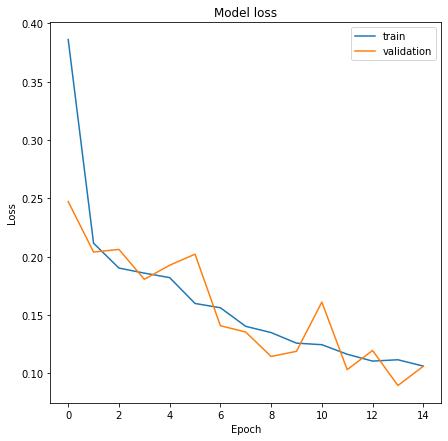

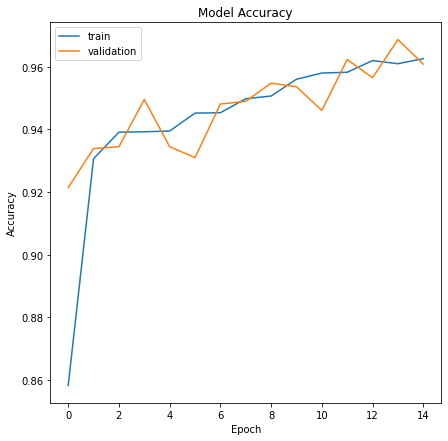

In [33]:
# The history.history["loss"] entry is a dictionary with as many values as epochs that the
# model was trained on. 
df_loss_acc = pd.DataFrame(data_train.history)
df_loss= df_loss_acc[['loss','val_loss']]
df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
df_acc= df_loss_acc[['accuracy','val_accuracy']]
df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)
df_loss.plot(title='Model loss',figsize=(7,7)).set(xlabel='Epoch',ylabel='Loss')
df_acc.plot(title='Model Accuracy',figsize=(7,7)).set(xlabel='Epoch',ylabel='Accuracy')

###### Bonn dataset

In [5]:
# Load the dataset
df = pd.read_csv("boston.csv")
df.head()

,Unnamed: 0,f1,f2,f3,f4,f5,class
0,0,0.887621,0.185875,2.299474,2.299474,0.581396,healthy
1,1,0.783744,0.163794,2.299480,2.299480,0.588340,healthy
2,2,0.875873,0.154714,2.299477,2.299477,0.589802,healthy
3,3,0.881293,0.138396,2.299481,2.299481,0.592911,healthy
4,4,0.798116,0.125291,2.299481,2.299481,0.595338,healthy


In [6]:
df=df.iloc[:,1:]

In [7]:
df["Target"] = df["class"]

df['Target'] = df.Target.map({"seizure": 1, "healthy": 0, "transation": 0}) # Checking for presence of CLass 1
df.head(5)
df.drop(df.columns[5], axis=1, inplace=True)


In [8]:
feature_data = df.iloc[:,0:5]
feature_data.head()

,f1,f2,f3,f4,f5
0,0.887621,0.185875,2.299474,2.299474,0.581396
1,0.783744,0.163794,2.299480,2.299480,0.588340
2,0.875873,0.154714,2.299477,2.299477,0.589802
3,0.881293,0.138396,2.299481,2.299481,0.592911
4,0.798116,0.125291,2.299481,2.299481,0.595338


In [15]:
feature_data.shape

(300, 5)

In [16]:
#dataprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(feature_data)
#X_train_minmax

In [18]:
y = df["Target"]
x_train, x_test, y_train, y_test = train_test_split(X_train_minmax,y,test_size = 0.30 ,stratify= y, random_state = 0)

In [19]:
num_folds=10
acc_per_fold = []
loss_per_fold = []

In [20]:
# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)
X_train_tf = np.expand_dims(x_train, axis=2)
X_valid_tf = np.expand_dims(x_test, axis=2)

y_train = keras.utils.to_categorical(y_train , num_classes=2)
y_valid = keras.utils.to_categorical(y_test , num_classes=2)

In [21]:
print(x_test.shape)
print(y_valid.shape)

(90, 5)
(90, 2)


In [41]:
# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(X_train_tf, y_train):

  # Define the model architecture
  model = Sequential()
  model.add(Convolution1D(64, 10, strides=2, padding='same', activation='relu',  input_shape=(5, 1)))
  model.add(Dropout(0.2))
  model.add(MaxPooling1D(3))
  model.add(Convolution1D(40, 5, strides=2, padding='same', activation='relu'))
  model.add(Dropout(0.2))
  model.add(Convolution1D(32, 4, strides=1, padding='same', activation='relu'))
  model.add(Dropout(0.2))
  model.add(GlobalAveragePooling1D())
  model.add(Dense(50, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(2, activation='softmax'))

  
  # Compile the model
  model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Fit data to model
  data_train=model.fit(X_train_tf, y_train, epochs= 15, validation_data=(X_valid_tf, y_valid), batch_size=20)

  # Generate generalization metrics
  scores = model.evaluate(X_train_tf[test], y_train[test], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # Increase fold number
  fold_no = fold_no + 1

# == Provide average scores ==

print('Score per fold')
for i in range(0, len(acc_per_fold)):
    print('------------------------------------------------------------------------')
    print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/15
35/35 [==============================] - 1s 11ms/step - loss: 0.6649 - accuracy: 0.8391 - val_loss: 0.4214 - val_accuracy: 0.9800
Epoch 2/15
35/35 [==============================] - 0s 5ms/step - loss: 0.2635 - accuracy: 0.9774 - val_loss: 0.1024 - val_accuracy: 0.9800
Epoch 3/15
35/35 [==============================] - 0s 4ms/step - loss: 0.0976 - accuracy: 0.9851 - val_loss: 0.1003 - val_accuracy: 0.9800
Epoch 4/15
35/35 [==============================] - 0s 5ms/step - loss: 0.0904 - accuracy: 0.9878 - val_loss: 0.1012 - val_accuracy: 0.9800
Epoch 5/15
35/35 [==============================] - 0s 5ms/step - loss: 0.0963 - accuracy: 0.9867 - val_loss: 0.1054 - val_accuracy: 0.9800
Epoch 6/15
35/35 [==============================] - 0s 5ms/step - loss: 0.1057 - accuracy: 0.9832 - val_loss: 0.0987 - val_accuracy: 0.9800
Epoch 7/15
35/35 [==============================] - 0s 5ms/ste

###### chb dataset

In [23]:
# Load the dataset
df = pd.read_csv("chb.csv")
df.head()

,T8-P8-1_n_peaks,T8-P8-1_n_crossings,T8-P8-1_hfd,T8-P8-1_pfd,T8-P8-1_hurst_exp,T8-P8-1_spectral_entropy,T8-P8-1_total_power,T8-P8-1_median_freq,T8-P8-1_peak_freq,T8-P8-1_hjorth_mobility,T8-P8-1_hjorth_complexity,T8-P8-1_power_1hz,T8-P8-1_power_5hz,T8-P8-1_power_10hz,T8-P8-1_power_15hz,T8-P8-1_power_20hz,seizure
0,183,153,0.094016,0.611024,0.879401,0.747444,5.090000e-10,3,1,0.002766,171.222337,0.420823,0.226051,0.128492,0.106838,0.117797,0
1,183,165,0.092275,0.611024,0.746361,0.765824,5.560000e-10,3,1,0.003211,148.493351,0.384135,0.234295,0.140616,0.115382,0.125572,0
2,186,170,0.098374,0.610385,0.687973,0.752050,5.450000e-10,3,1,0.003564,142.209197,0.389655,0.238327,0.124545,0.109260,0.138213,0
3,189,166,0.099552,0.609756,0.726399,0.754101,5.920000e-10,3,1,0.003514,140.840795,0.396989,0.232559,0.120853,0.118132,0.131467,0
4,188,167,0.101196,0.609756,0.755442,0.758187,5.830000e-10,3,1,0.003494,142.434220,0.390794,0.230665,0.125717,0.119646,0.133177,0


In [24]:
feature_data = df.iloc[:,0:-1]
feature_data.head()

,T8-P8-1_n_peaks,T8-P8-1_n_crossings,T8-P8-1_hfd,T8-P8-1_pfd,T8-P8-1_hurst_exp,T8-P8-1_spectral_entropy,T8-P8-1_total_power,T8-P8-1_median_freq,T8-P8-1_peak_freq,T8-P8-1_hjorth_mobility,T8-P8-1_hjorth_complexity,T8-P8-1_power_1hz,T8-P8-1_power_5hz,T8-P8-1_power_10hz,T8-P8-1_power_15hz,T8-P8-1_power_20hz
0,183,153,0.094016,0.611024,0.879401,0.747444,5.090000e-10,3,1,0.002766,171.222337,0.420823,0.226051,0.128492,0.106838,0.117797
1,183,165,0.092275,0.611024,0.746361,0.765824,5.560000e-10,3,1,0.003211,148.493351,0.384135,0.234295,0.140616,0.115382,0.125572
2,186,170,0.098374,0.610385,0.687973,0.752050,5.450000e-10,3,1,0.003564,142.209197,0.389655,0.238327,0.124545,0.109260,0.138213
3,189,166,0.099552,0.609756,0.726399,0.754101,5.920000e-10,3,1,0.003514,140.840795,0.396989,0.232559,0.120853,0.118132,0.131467
4,188,167,0.101196,0.609756,0.755442,0.758187,5.830000e-10,3,1,0.003494,142.434220,0.390794,0.230665,0.125717,0.119646,0.133177


In [25]:
#dataprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(feature_data)
#X_train_minmax

In [28]:
y = df["seizure"]
x_train, x_test, y_train, y_test = SplitData(X_train_minmax,y , 0.30)

In [33]:
feature_data.shape

(1000, 16)

In [29]:
num_folds=10
acc_per_fold = []
loss_per_fold = []

In [30]:
# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)
X_train_tf = np.expand_dims(x_train, axis=2)
X_valid_tf = np.expand_dims(x_test, axis=2)

y_train = keras.utils.to_categorical(y_train , num_classes=2)
y_valid = keras.utils.to_categorical(y_test , num_classes=2)

In [31]:
print(x_test.shape)
print(y_valid.shape)

(300, 16)
(300, 2)


In [37]:
# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(X_train_tf, y_train):

  # Define the model architecture
  model = Sequential()
  model.add(Convolution1D(64, 10, strides=2, padding='same', activation='relu',  input_shape=(16, 1)))
  model.add(Dropout(0.2))
  model.add(MaxPooling1D(3))
  model.add(Convolution1D(40, 5, strides=2, padding='same', activation='relu'))
  model.add(Dropout(0.2))
  model.add(Convolution1D(32, 4, strides=1, padding='same', activation='relu'))
  model.add(Dropout(0.2))
  model.add(GlobalAveragePooling1D())
  model.add(Dense(50, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(2, activation='softmax'))

  
  # Compile the model
  model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Fit data to model
  data_train=model.fit(X_train_tf, y_train, epochs= 15, validation_data=(X_valid_tf, y_valid), batch_size=20)

  # Generate generalization metrics
  scores = model.evaluate(X_train_tf[test], y_train[test], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # Increase fold number
  fold_no = fold_no + 1

# == Provide average scores ==

print('Score per fold')
for i in range(0, len(acc_per_fold)):
    print('------------------------------------------------------------------------')
    print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/15
35/35 [==============================] - 2s 12ms/step - loss: 0.5854 - accuracy: 0.9432 - val_loss: 0.1051 - val_accuracy: 0.9800
Epoch 2/15
35/35 [==============================] - 0s 5ms/step - loss: 0.1098 - accuracy: 0.9828 - val_loss: 0.0983 - val_accuracy: 0.9800
Epoch 3/15
35/35 [==============================] - 0s 5ms/step - loss: 0.0837 - accuracy: 0.9861 - val_loss: 0.0991 - val_accuracy: 0.9800
Epoch 4/15
35/35 [==============================] - 0s 5ms/step - loss: 0.1035 - accuracy: 0.9827 - val_loss: 0.0983 - val_accuracy: 0.9800
Epoch 5/15
35/35 [==============================] - 0s 5ms/step - loss: 0.0966 - accuracy: 0.9848 - val_loss: 0.0979 - val_accuracy: 0.9800
Epoch 6/15
35/35 [==============================] - 0s 5ms/step - loss: 0.0919 - accuracy: 0.9837 - val_loss: 0.1005 - val_accuracy: 0.9800
Epoch 7/15
35/35 [==============================] - 0s 5ms/ste

[Text(0, 0.5, 'Accuracy'), Text(0.5, 0, 'Epoch')]

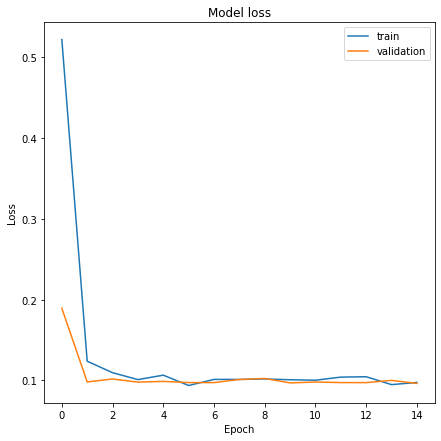

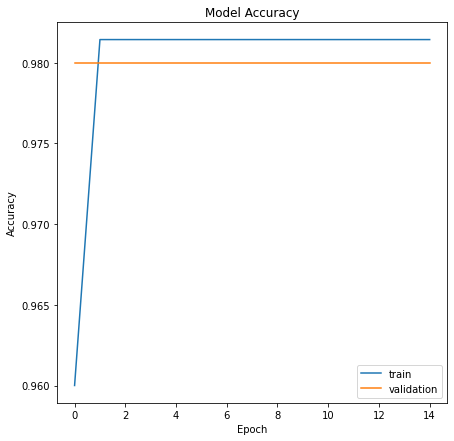

In [38]:
# The history.history["loss"] entry is a dictionary with as many values as epochs that the
# model was trained on. 
df_loss_acc = pd.DataFrame(data_train.history)
df_loss= df_loss_acc[['loss','val_loss']]
df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
df_acc= df_loss_acc[['accuracy','val_accuracy']]
df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)
df_loss.plot(title='Model loss',figsize=(7,7)).set(xlabel='Epoch',ylabel='Loss')
df_acc.plot(title='Model Accuracy',figsize=(7,7)).set(xlabel='Epoch',ylabel='Accuracy')

# Bayes Algo

In [ ]:
df.drop(df.columns[0], axis=1, inplace=True)
df.head(5)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,1
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [ ]:
df['y'] = df.y.map({1: 1, 2: 0, 3: 0, 4: 0,5:0})
df.head(5)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,0
1,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,1
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,0
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,0
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,4,2,-12,-32,-41,-65,-83,-89,-73,0


In [ ]:
df.shape

(11500, 179)

In [ ]:
df['y'].value_counts() 

0    9200
1    2300
Name: y, dtype: int64

<AxesSubplot:>

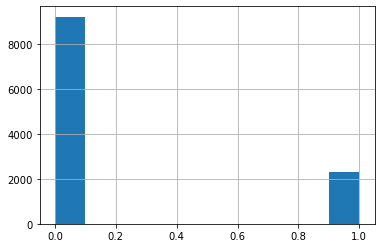

In [ ]:
df['y'].hist()

In [ ]:
data = [df["X1"], df["X2"], df["X3"],df["X4"], df["X5"] ]
headers = ['X1', 'X2','X3','X4','X5']
features_df = pd. concat(data, axis=1, keys=headers)
features_df.head(5)
#'X11', 'X10','X12','X44','X158'

,X1,X2,X3,X4,X5
0,135,190,229,223,192
1,386,382,356,331,320
2,-32,-39,-47,-37,-32
3,-105,-101,-96,-92,-89
4,-9,-65,-98,-102,-78


In [ ]:
X_TRAIN, X_TEST, Y_TRAIN, Y_TEST = train_test_split(features_df.iloc[:, 0:6].values, df.iloc[:, -1].values, train_size = 0.7, random_state = 101)

In [ ]:
X_TRAIN.shape

(8049, 5)

In [ ]:
X_TEST.shape


(3451, 5)

In [ ]:
X_TRAIN = np.transpose(X_TRAIN) # Converting features in column format
X_TEST = np.transpose(X_TEST)
X_TEST

array([[  6,  91, 101, ..., -45,  22,  42],
       [  7, 101,  96, ..., -59,  26,  44],
       [ -1, 100,  91, ..., -62,  22,  36],
       [-13,  97,  84, ..., -53,  15,  28],
       [-21, 106,  79, ..., -26,   7,  37]], dtype=int64)

In [ ]:
Y_TRAIN = np.transpose(Y_TRAIN).reshape(1,8049)
Y_TEST = np.transpose(Y_TEST).reshape(1,3451)

In [ ]:
Total_Train_sample = 8049
no_of_c1 = np.sum(Y_TRAIN == 1)  # no.of C1 class records
no_of_c2 = np.sum(Y_TRAIN == 0)  # no.of C2 Class records


print(no_of_c1,no_of_c2)


1631 6418


In [ ]:
# Calculating prior for each class
prior_c1 =  no_of_c1/Total_Train_sample
prior_c2 =  no_of_c2/Total_Train_sample

print(prior_c1,prior_c2)

0.20263386756118773 0.7973661324388123


In [ ]:
#Y_TRAIN.shape

In [ ]:
full_train  = np.append(X_TRAIN, Y_TRAIN, axis=0)
full_train

array([[  32, -219, -135, ...,   44, -925,   23],
       [  52, -221, -145, ...,   52, -759,   14],
       [  38, -203, -151, ...,   55, -443,   12],
       [  24, -165, -155, ...,   57,  -60,    9],
       [ -24, -136, -165, ...,   49,  313,   11],
       [   0,    0,    1, ...,    0,    1,    0]], dtype=int64)

In [ ]:
c1_index = [index for index, value in enumerate(full_train[5,:]) if value == 1]
c2_index = [index for index, value in enumerate(full_train[5,:]) if value == 0]


In [ ]:
# Dividing train data as per class

c1_train_data = X_TRAIN[:,c1_index]
c2_train_data = X_TRAIN[:,c2_index]


In [ ]:
# Calculating mean for all the two class

c1_mean = np.mean(c1_train_data, axis=1).reshape(5,1)
c2_mean = np.mean(c2_train_data, axis=1).reshape(5,1)


In [ ]:
#Calculating covarience for all the two classes

c1_cov = np.cov(c1_train_data)
c2_cov = np.cov(c2_train_data)


In [ ]:
# Calculating the likelihood by gaussian distribution formula

def likelihood(x, mu, cov, k):
    numerator = np.exp(-0.5 * np.matmul(np.matmul(np.transpose(x - mu), np.linalg.inv(cov)), (x - mu)))
    denominator = np.sqrt(((2 * np.pi) ** k) * np.linalg.det(cov))
    return numerator/denominator

In [ ]:
X_TRAIN.shape[1]

8049

In [ ]:
predictions =[]
for i in range(X_TRAIN.shape[1]):
    sample = np.array(X_TRAIN[[0,1,2,3,4],i]).reshape(5,1)
    C1_posterior = prior_c1 * likelihood(sample, c1_mean, c1_cov, 5)
    C2_posterior = prior_c2 * likelihood(sample, c2_mean, c2_cov, 5)
      
    if   C1_posterior > C2_posterior:
             sample_class = 1
    else:
            sample_class = 2
    
    predictions.append(sample_class)
    

In [ ]:
#train_result = predictions ==Y_TRAIN
train_correct_predict = np.count_nonzero(Y_TRAIN)
#correct_predict

In [ ]:
# Training accuracy ( total no of samples correctly predicted / total no.of samples)
train_accuracy = train_correct_predict/105
print('Training data accuracy is {} '.format(train_accuracy))

Training data accuracy is 15.533333333333333 


In [ ]:
# Checking on the Test Data

In [ ]:
predictions =[]
for i in range(X_TEST.shape[1]):
    sample = np.array(X_TEST[[0,1,2,3,4],i]).reshape(5,1)
    C1_posterior = prior_c1 * likelihood(sample, c1_mean, c1_cov, 5)
    C2_posterior = prior_c2 * likelihood(sample, c2_mean, c2_cov, 5)
     
    if   C1_posterior > C2_posterior:
             sample_class = 1
    else:        
            sample_class = 2
    
    predictions.append(sample_class)
    

In [ ]:
#test_result = test_predictions ==Y_TEST
test_correct_predict = np.count_nonzero(Y_TEST)

In [ ]:
test_accuracy = test_correct_predict/45
print('Test data accuracy is {} '.format(test_accuracy))

Test data accuracy is 14.866666666666667 


##### Boston data set 

In [ ]:
# Load the dataset
df = pd.read_csv("boston.csv")
df.head()

,Unnamed: 0,f1,f2,f3,f4,f5,class
0,0,0.887621,0.185875,2.299474,2.299474,0.581396,healthy
1,1,0.783744,0.163794,2.299480,2.299480,0.588340,healthy
2,2,0.875873,0.154714,2.299477,2.299477,0.589802,healthy
3,3,0.881293,0.138396,2.299481,2.299481,0.592911,healthy
4,4,0.798116,0.125291,2.299481,2.299481,0.595338,healthy


In [ ]:
df=df.iloc[:,1:]

In [ ]:
df["Target"] = df["class"]

df['Target'] = df.Target.map({"seizure": 1, "healthy": 0, "transation": 0}) # Checking for presence of CLass 1
df.head(5)
df.drop(df.columns[5], axis=1, inplace=True)


In [ ]:
df.head(5)

,f1,f2,f3,f4,f5,Target
0,0.887621,0.185875,2.299474,2.299474,0.581396,0
1,0.783744,0.163794,2.299480,2.299480,0.588340,0
2,0.875873,0.154714,2.299477,2.299477,0.589802,0
3,0.881293,0.138396,2.299481,2.299481,0.592911,0
4,0.798116,0.125291,2.299481,2.299481,0.595338,0


In [ ]:
X_TRAIN, X_TEST, Y_TRAIN, Y_TEST = train_test_split(df.iloc[:, 0:5].values, df.iloc[:, -1].values, train_size = 0.7, random_state = 101)

In [ ]:
X_TRAIN.shape

(210, 5)

In [ ]:
X_TEST.shape


(90, 5)

In [ ]:
X_TRAIN = np.transpose(X_TRAIN) # Converting features in column format
X_TEST = np.transpose(X_TEST)
#X_TEST

In [ ]:
Y_TRAIN = np.transpose(Y_TRAIN).reshape(1,210)
Y_TEST = np.transpose(Y_TEST).reshape(1,90)

In [ ]:
Total_Train_sample = 8049
no_of_c1 = np.sum(Y_TRAIN == 1)
no_of_c2 = np.sum(Y_TRAIN == 0)


print(no_of_c1,no_of_c2)


68 142


In [ ]:
# Calculating prior for each class
prior_c1 =  no_of_c1/Total_Train_sample
prior_c2 =  no_of_c2/Total_Train_sample

print(prior_c1,prior_c2)

0.008448254441545533 0.017641943098521556


In [ ]:
#Y_TRAIN.shape

In [ ]:
#full_train  = np.append(X_TRAIN, Y_TRAIN, axis=0)
#full_train

In [ ]:
c1_index = [index for index, value in enumerate(full_train[5,:]) if value == 1]
c2_index = [index for index, value in enumerate(full_train[5,:]) if value == 0]


In [ ]:
# Dividing train data as per class

#c1_train_data = X_TRAIN[:,c1_index]
#c2_train_data = X_TRAIN[:,c2_index]


In [ ]:
# Calculating mean for all the three class

c1_mean = np.mean(c1_train_data, axis=1).reshape(5,1)
c2_mean = np.mean(c2_train_data, axis=1).reshape(5,1)


In [ ]:
#Calculating covarience for all the three classes

c1_cov = np.cov(c1_train_data)
c2_cov = np.cov(c2_train_data)


In [ ]:
# Calculating the likelihood by gaussian distribution formula

def likelihood(x, mu, cov, k):
    numerator = np.exp(-0.5 * np.matmul(np.matmul(np.transpose(x - mu), np.linalg.inv(cov)), (x - mu)))
    denominator = np.sqrt(((2 * np.pi) ** k) * np.linalg.det(cov))
    return numerator/denominator

In [ ]:
X_TRAIN.shape[1]

In [ ]:
predictions =[]
for i in range(X_TRAIN.shape[1]):
    sample = np.array(X_TRAIN[[0,1,2,3,4],i]).reshape(5,1)
    C1_posterior = prior_c1 * likelihood(sample, c1_mean, c1_cov, 2)
    C2_posterior = prior_c2 * likelihood(sample, c2_mean, c2_cov, 2)
      
    if   C1_posterior > C2_posterior:
             sample_class = 1
    else:
            sample_class = 2
    
    predictions.append(sample_class)
    

In [ ]:
#train_result = predictions ==Y_TRAIN
train_correct_predict = np.count_nonzero(Y_TRAIN)
#correct_predict

In [ ]:
# Training accuracy ( total no of samples correctly predicted / total no.of samples)
train_accuracy = train_correct_predict/105
print('Training data accuracy is {} '.format(train_accuracy))

In [ ]:
# Checking on the Test Data

In [ ]:
predictions =[]
for i in range(X_TEST.shape[1]):
    sample = np.array(X_TEST[[0,1,2,3,4],i]).reshape(5,1)
    C1_posterior = prior_c1 * likelihood(sample, c1_mean, c1_cov, 2)
    C2_posterior = prior_c2 * likelihood(sample, c2_mean, c2_cov, 2)
     
    if   C1_posterior > C2_posterior:
             sample_class = 1
    else:        
            sample_class = 2
    
    predictions.append(sample_class)
    

In [ ]:
#test_result = test_predictions ==Y_TEST
test_correct_predict = np.count_nonzero(Y_TEST)

In [ ]:
test_accuracy = test_correct_predict/45
print('Test data accuracy is {} '.format(test_accuracy))

# ROC

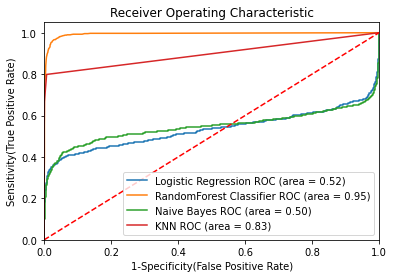

In [ ]:
plt.figure()

# Add the models to the list that you want to view on the ROC plot
models = [
{'label': 'Logistic Regression','model': LogisticRegression(),},
{'label': 'RandomForest Classifier','model': RandomForestClassifier(n_estimators = 100)  ,},
{'label': 'Naive Bayes','model': MultinomialNB(),},
{'label': 'KNN','model': KNeighborsClassifier(n_neighbors=3),},
    ]

for m in models:
    model = m['model'] # select the model
    model.fit(x_train, y_train) # train the model
    y_pred=model.predict(x_test) # predict the test data
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(x_test)[:,1])
# Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test,model.predict(x_test))
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()   # Display